_Lunes 4 de septiembre de 2023_

<h4><center>Machine Learning: Aprendizaje Supervisado</center></h4>
<h4><center>Regresión</center></h4>

**Regresión Lineal Simple**

La ecuación de una recta es:

<h7><center>y= mX+b </center></h7>

Donde:

- y  es el valor de la variable dependiente (lo que estamos prediciendo en el modelo)
- x  es el valor de la variable independiente (los features)
- m  es la pendiente de la recta
- b  es el intercepto de la recta

**Objetivo práctico**

A partir del dataset de artículos, usando machine learning vamos a tratar de predecir, cuantas veces será compartido un artículo por redes sociales

**ETAPA 1: ENTENDIMIENTO DEL NEGOCIO**

- Nos piden hacer un modelo predictivo (Machine Learning)
- Texto que se comparten a través de redes sociales
- Hay temas de frecuencias
- Hay conteo de cuántas veces será compartido
- Nos piden predecir cantidad de veces que se comparte un artículo
- la variable dependiente y: cantidad de share (cantidad de veces que se comparte)
- Modelo Supervisado


**ETAPA 2: ENTENDIMIENTO DE LOS DATOS**

<h9><center>**EDA (EXPLORATORY DATA ANALYSIS)**</center></h9>

In [1]:
#Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from sklearn import linear_model #librería para hacer regresiones líneales
from sklearn.metrics import mean_squared_error, r2_score #librería para métricas y evaluar los modelos
from sklearn.model_selection import train_test_split #librería para separar (split) datos en entrenamiento (train) y testing (test)

In [2]:
#Cargamos el archivo a un DataFrame
#El archivo se llama 'articulos_ml.csv'
path = '/articulos_ml.csv'
#Leamos el dataset y veamos las primeras filas
data = pd.read_csv(path)
data.head(25)

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
5,5 ways Data Science and Machine Learning impac...,NaN,761,0,NaN,1,14,21000
6,200 universities just launched 600 free online...,https://qz.com/1120344/200-universities-just-l...,6462,600,28.0,2,170,200000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0.0,1,78,77000
8,Tech companies should stop pretending AI won’t...,https://www.technologyreview.com/s/610298/tech...,1118,2,NaN,1,62,59400
9,Artificial intelligence is going to completely...,NaN,1581,4,NaN,2,60,35000


nuestra variable objetivo es # Shares y tenemos otras 7 variables predictoras o de entrada

In [3]:
data.loc[[108]]

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
108,[Log] 35: Apple launches machine learning rese...,[Log] 35: https://techcrunch.com/2017/07/19/ap...,2486,1,13.0,6,36,53449


In [4]:
#Miremos la info del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           161 non-null    object 
 1   url             122 non-null    object 
 2   Word count      161 non-null    int64  
 3   # of Links      161 non-null    int64  
 4   # of comments   129 non-null    float64
 5   # Images video  161 non-null    int64  
 6   Elapsed days    161 non-null    int64  
 7   # Shares        161 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.2+ KB


In [5]:
#Miremos el tañamo (filas, columnas)
data.shape

(161, 8)

In [6]:
#Mirmos las estadísticas de las variables numéricas
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


In [7]:
#Miramos las estadísticas de las variables categoricas
data.describe(include=['O'])

,Title,url
count,161,122
unique,161,121
top,What is Machine Learning and how do we use it ...,https://www.analyticsvidhya.com/blog/2017/05/p...
freq,1,2


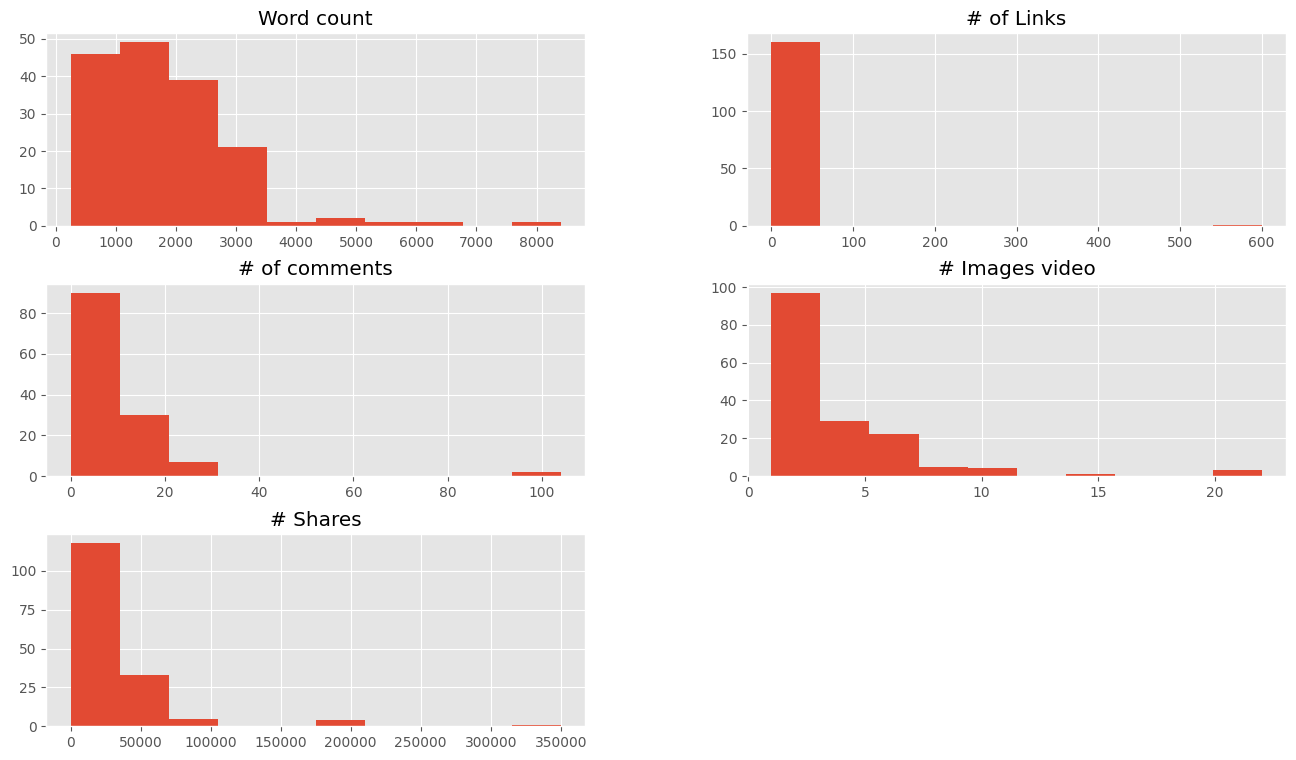

In [8]:
#Miremos la distribución de las algunas variables de entrada
data_vn=data.drop(['Title', 'url', 'Elapsed days'],axis=1)
data_vn.hist()
plt.show();

En todas las variables vemos distribución asimétrica positiva

<Axes: >

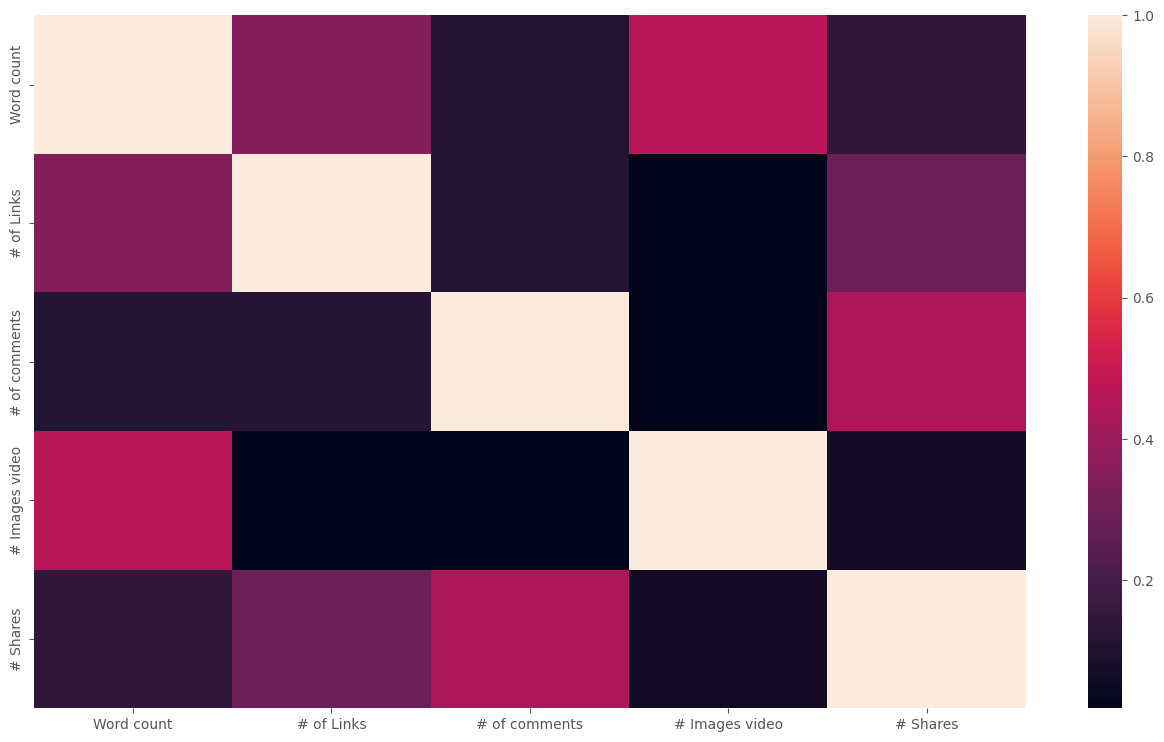

In [9]:
sns.heatmap(data_vn.corr())

**CONCLUSIÓN:** La variable Word Count está correlacionada con la variable objetivo en un ~20%.

Según la gráfica de correlación, las variables más relacionadas con nuestra variable objetivo son # of comments ~50% y # of Links ~35%.

**NOTA IMPORTANTE:** Pra l regresión lineal simple debemos tener dos variables, la variable predictora 'x' y la variable objetivo 'y'. Estadísticamente la variable más correlacionada a nuestra variable objetivo es # of comments. Sin embargo, se deben profundizar en el EDA y trabajar los datos nulos y típicos para obtener conclusiones más concisas.

*Para efectos académicos y prácticos, tomaremos como variable predictora 'x' a Word count

<h9><center>**Tratamos los datos Nulos**</center></h9>

In [10]:
data.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

In [11]:
nulos_url = data['url'].isnull().sum()
nulos_url

39

In [12]:
nulos_comm = data['# of comments'].isnull().sum()
nulos_comm

32

In [13]:
data['# of comments'].fillna(round(data['# of comments'].mean(),0), inplace=True)

In [14]:
data['# of comments'] = data['# of comments'].astype(int)

In [15]:
data['url'].fillna("sin url",inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           161 non-null    object
 1   url             161 non-null    object
 2   Word count      161 non-null    int64 
 3   # of Links      161 non-null    int64 
 4   # of comments   161 non-null    int64 
 5   # Images video  161 non-null    int64 
 6   Elapsed days    161 non-null    int64 
 7   # Shares        161 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 10.2+ KB


<h9><center>**Tratamos los valores atípicos**</center></h9>

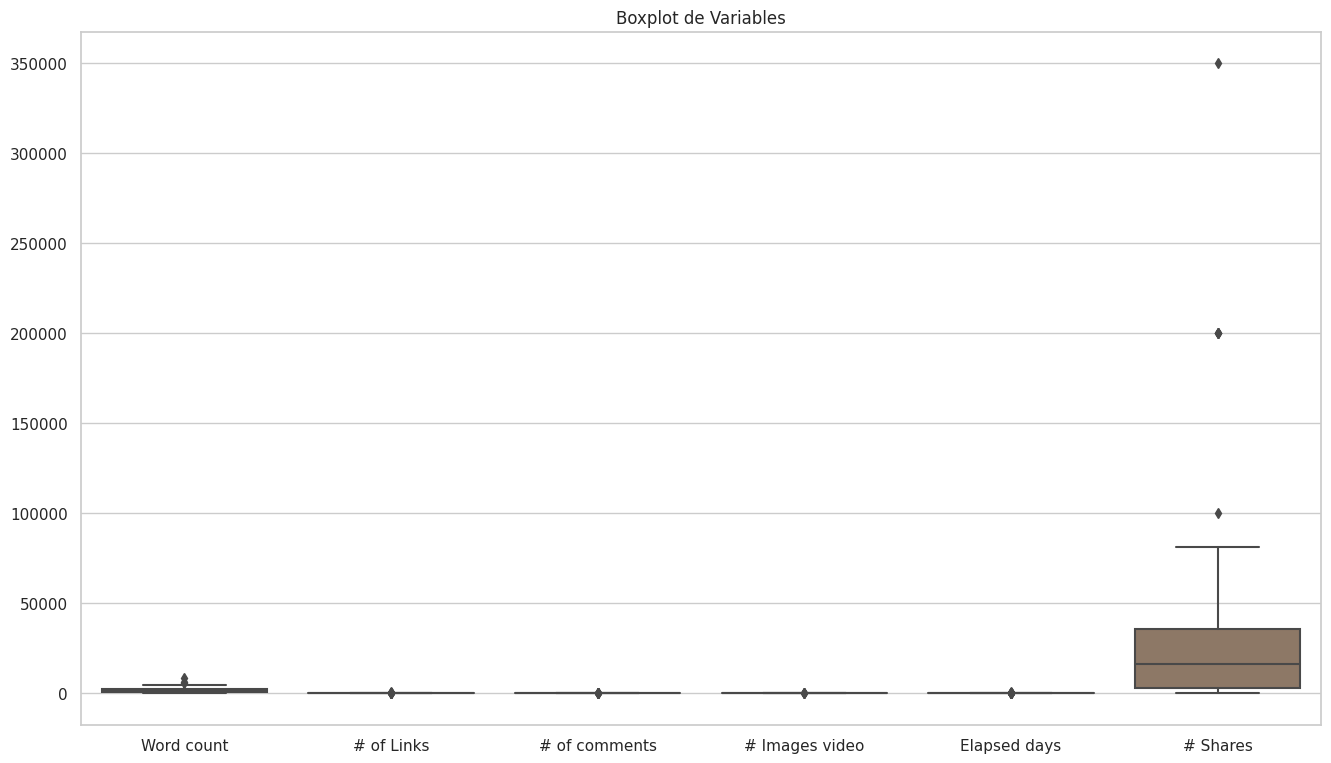

In [17]:
sns.set(style="whitegrid")
plt.figure()
sns.boxplot(data=data)
plt.title("Boxplot de Variables")
plt.show()

In [18]:
percentil_25 = data['# Shares'].quantile(0.25)
percentil_75 = data['# Shares'].quantile(0.75)

iqr = percentil_75 - percentil_25

umbral_superior = percentil_75 + 1.5 * iqr
umbral_inferior = percentil_25 - 1.5 * iqr

valores_atipicos = data[(data['# Shares'] > umbral_superior) | (data['# Shares'] < umbral_inferior)]

In [19]:
valores_atipicos

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2,2,34,200000
3,Dbrain and the Blockchain of Artificial Intell...,sin url,1221,3,9,2,68,200000
4,Nasa finds entire solar system filled with eig...,sin url,2039,1,104,4,131,200000
6,200 universities just launched 600 free online...,https://qz.com/1120344/200-universities-just-l...,6462,600,28,2,170,200000
10,Facebook robots shut down after they talk to e...,sin url,2090,1,95,1,267,100000
11,A visual introduction to machine learning,http://www.r2d3.us/visual-intro-to-machine-lea...,1099,4,9,15,1002,350000


In [20]:
valores_atipicos.index

Int64Index([0, 3, 4, 6, 10, 11], dtype='int64')

In [21]:
data.drop(valores_atipicos.index, inplace=True)


In [22]:
data

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
1,10 Companies Using Machine Learning in Cool Ways,sin url,1742,9,9,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,sin url,962,6,0,1,10,42000
5,5 ways Data Science and Machine Learning impac...,sin url,761,0,9,1,14,21000
7,How Machine Learning can help Cryptocurrency T...,https://cryptovest.com/news/how-machine-learni...,753,3,0,1,78,77000
8,Tech companies should stop pretending AI won’t...,https://www.technologyreview.com/s/610298/tech...,1118,2,9,1,62,59400
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12,3,87,33660


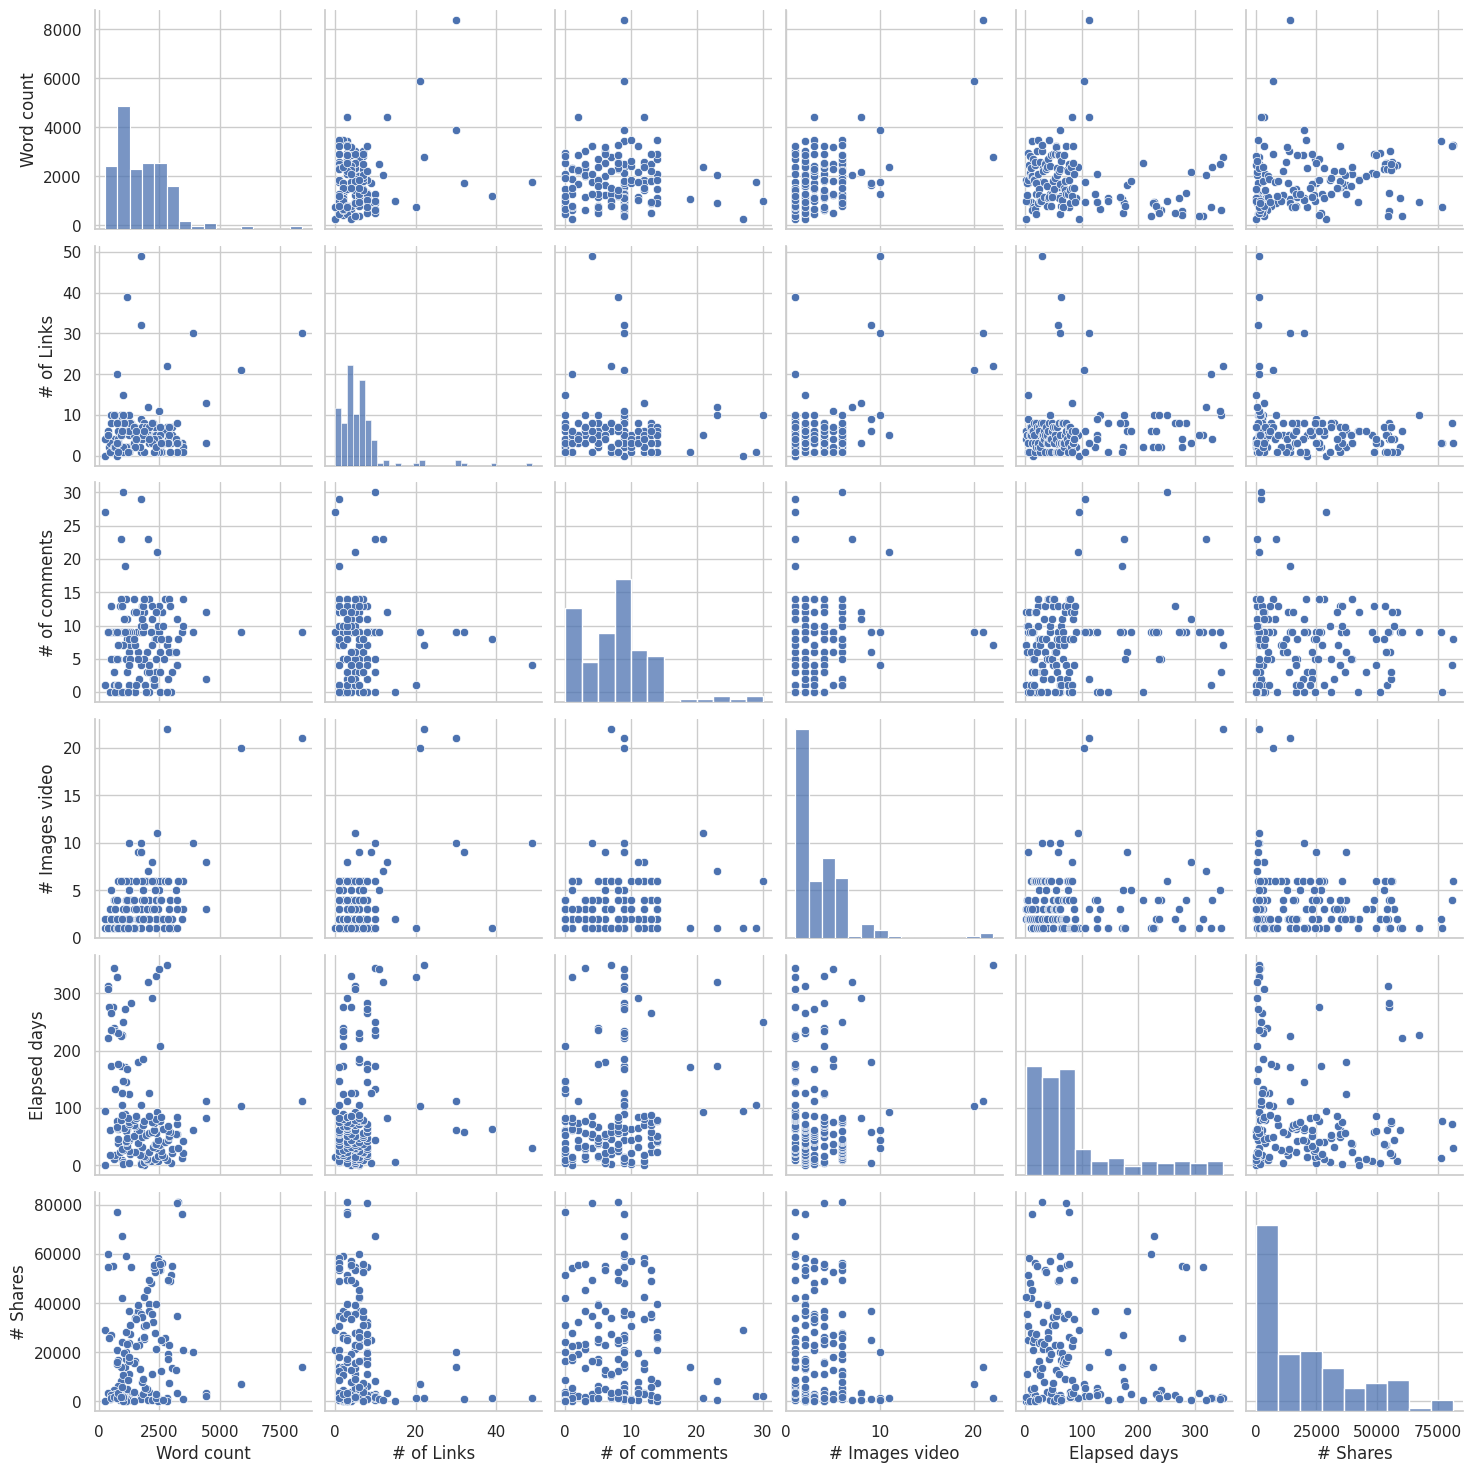

In [23]:
sns.pairplot(data)
plt.show()

<ipython-input-24-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

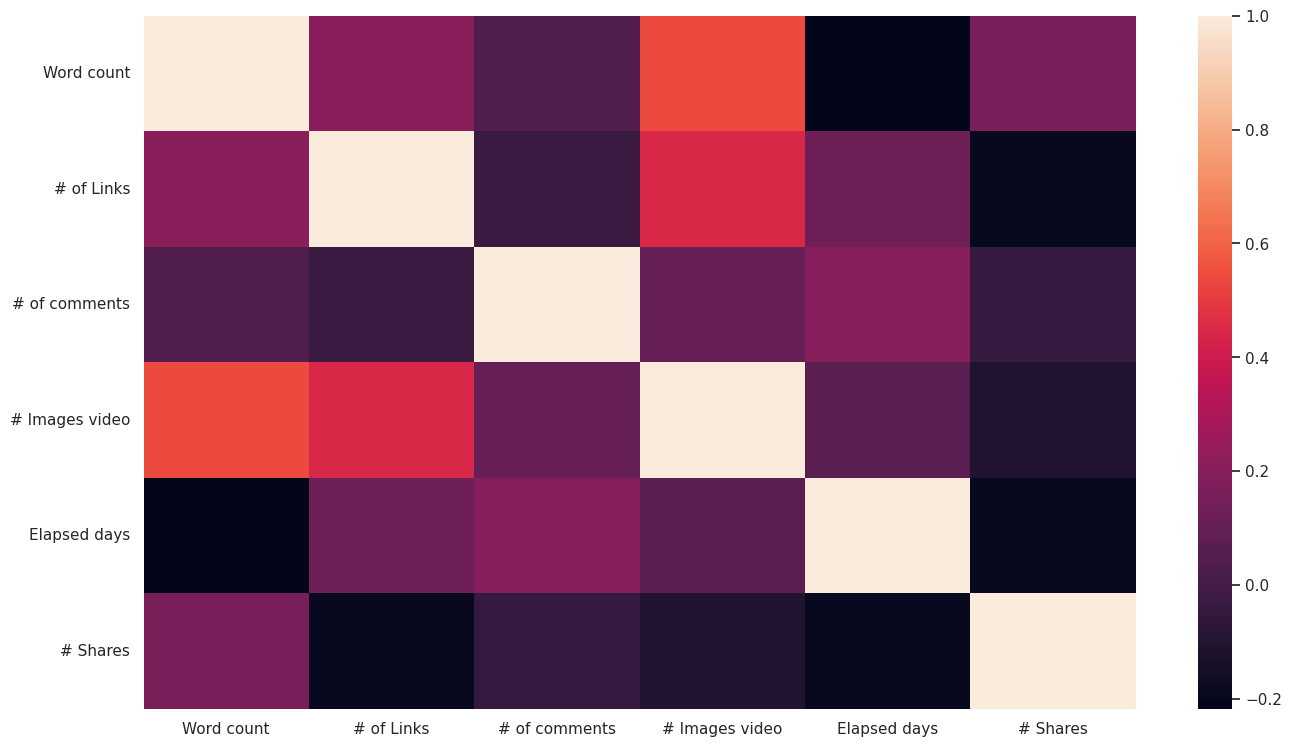

In [24]:
sns.heatmap(data.corr())

La variable # Shares está correlacionada con word count ~30%

**ETAPA 3: PREPARACIÓN DE DATOS**

Modelo de Machine Learning Supervisado, abordaremos con una regresión Lineal Simple

In [25]:
#Cortemos los datos donde se concentran más los puntos
data_filtrada = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]
data_filtrada.shape

(148, 8)

In [27]:
#Configuramos los datos para la gráfica
colores = ['orange','blue']
tamanos = [30,60]

f1 = data['Word count'].values
f2 = data['# Shares'].values

In [28]:
#Vamos a graficar los registros y revisar cuales tienen la cantidad de palabras por encima de la media
media_palabras=data['Word count'].mean()
media_palabras

1782.7806451612903

In [29]:
#Pintamos en colores los puntos por debajo y por encima de la media de la cantidad de palabras
asignar = []

for index, row in data.iterrows():
    if row['Word count'] > media_palabras:
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

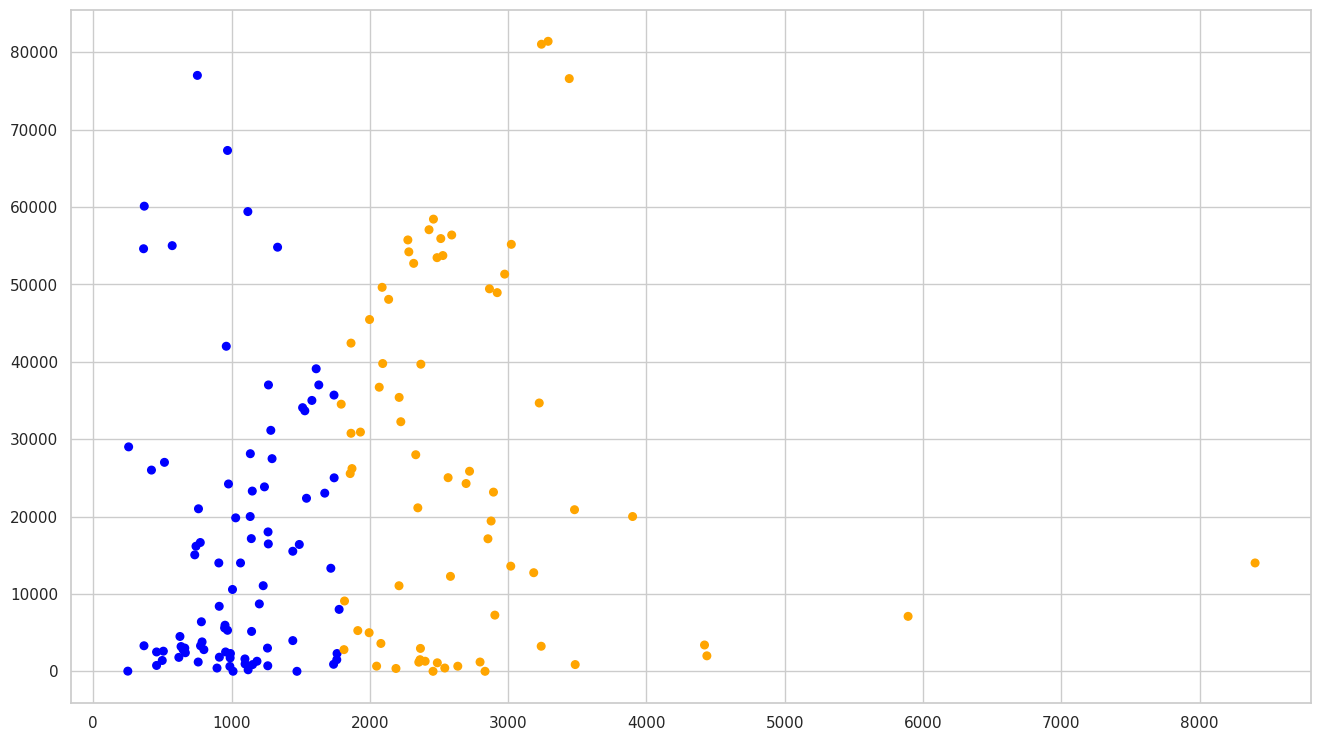

In [30]:
#Hacemos la gráfica
plt.scatter(f1,f2, c=asignar, s=tamanos[0])
plt.show()

In [31]:
#Creamos la matriz de features (en este caso es un vector)
X = data[['Word count']]

#Creamos el vector de target
y = data[['# Shares']]

In [36]:
#Separamos los conjuntos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=47,test_size=0.3)

**ETAPA 4: MODELAMIENTO**
    
    Creamos el modelo de Regresión lineal simple

In [37]:
#Instanciamos el modelo
reg = linear_model.LinearRegression()

In [38]:
reg

LinearRegression()

In [39]:
#Entrenamos el modelo
reg.fit(X_train,y_train)

LinearRegression()

In [40]:
reg

LinearRegression()

**Hacemos la predicción**

In [41]:
y_pred = reg.predict(X_test)
y_pre = y_pred

In [42]:
y_pre

array([[20804.5625549 ],
       [19351.8679228 ],
       [19192.3659784 ],
       [20124.83888414],
       [16858.72983798],
       [18144.56089748],
       [22483.01378523],
       [21702.68119569],
       [20836.46294378],
       [22345.59672544],
       [17138.47170971],
       [18107.75275646],
       [17150.74109004],
       [20519.91293104],
       [20571.44432846],
       [21273.25288384],
       [20510.09742677],
       [20645.0606105 ],
       [18627.97448282],
       [17840.28026508],
       [19859.82026882],
       [18093.02950005],
       [19261.07450829],
       [24316.05920783],
       [22713.6781356 ],
       [19150.65008525],
       [21140.74357618],
       [17803.47212406],
       [18772.75317082],
       [18605.88959821],
       [21381.22343082],
       [17879.54228216],
       [22058.49322551],
       [24159.01113949],
       [18176.46128636],
       [17764.21010698],
       [23413.0328149 ],
       [22134.56338361],
       [23346.77816107],
       [23108.7521825 ],


In [43]:
X_test

,Word count
88,1858
145,1266
155,1201
9,1581
41,250
136,774
70,2542
104,2224
149,1871
108,2486


In [44]:
data.loc[[88]]

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
88,[Log] 15: Story roundup: data to be grateful f...,[Log] 15: https://mixpanel.com/blog/2017/11/22...,1858,8,5,2,16,25548


Dato real de share 25548 vs dato de predicción 20804.56

In [45]:
#convirtamos la predicción en un DataFrame
y_pred=pd.DataFrame(y_pred, columns=['y_pred #Shares'])
y_pred

,y_pred #Shares
0,20804.562555
1,19351.867923
2,19192.365978
3,20124.838884
4,16858.729838
5,18144.560897
6,22483.013785
7,21702.681196
8,20836.462944
9,22345.596725


In [46]:
X_test=X_test.reset_index()
X_test

,index,Word count
0,88,1858
1,145,1266
2,155,1201
3,9,1581
4,41,250
5,136,774
6,70,2542
7,104,2224
8,149,1871
9,108,2486


In [47]:
#Concatenamos los DataFrame de test y la predicción
pd.merge(X_test, y_pred, left_index=True, right_index=True)

,index,Word count,y_pred #Shares
0,88,1858,20804.562555
1,145,1266,19351.867923
2,155,1201,19192.365978
3,9,1581,20124.838884
4,41,250,16858.729838
5,136,774,18144.560897
6,70,2542,22483.013785
7,104,2224,21702.681196
8,149,1871,20836.462944
9,108,2486,22345.596725


Según nuestro modelo supervisado de Regresión lineal, el artículo 108 que contiene 2486 palabras será compartido ~22345 veces. Veamos si eso es verdad

In [54]:
data.loc[108]

Title             [Log] 35: Apple launches machine learning rese...
url               [Log] 35: https://techcrunch.com/2017/07/19/ap...
Word count                                                     2486
# of Links                                                        1
# of comments                                                    13
# Images video                                                    6
Elapsed days                                                     36
# Shares                                                      53449
Name: 108, dtype: object

Vemos que el artículo 108 que contiene 2486 palabras, **fue compartido 53449 veces**. Y la predicción es de 22345.59 vemos que está muy lejano a la realidad

Veamos qué respuesta tendríamos del modelo con artículos con 250

In [49]:
reg.predict([[250]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16858.72983798]])

In [55]:
data.loc[41]

Title             Crean inteligencia artificial para evaluar inc...
url               https://www.fayerwayer.com/2018/04/crean-intel...
Word count                                                      250
# of Links                                                        4
# of comments                                                     1
# Images video                                                    2
Elapsed days                                                      1
# Shares                                                         22
Name: 41, dtype: object

para 250 palabras el modelo predice 16858.72 shares. Sin embargo la realidad es solo de 22 shares

Como vemos (intuimos, observamos) que el modelo no es muy preciso. Vamos a evaluar nuestro modelo

**ETAPA 5: EVALUACIÓN DEL MODELO**

recordemos... La ecuación de una recta es:

<h7><center>y= mx+b</center></h7>  

En este caso

- y  es las veces que se compartió el artículo *'# Share'*
- x  es la cantidad de palabras del artículo  *'Word count'*
- m  es la pendiente de la recta
- b  es el intercepto de la recta

In [56]:
#Veamos los coeficientes obtenidos 'm'
reg.coef_

array([[2.45387607]])

Significa que para cada unidad adicional que aumenta el número de palabras, es decir por cada nueva palabra en un artículo, y => la cantidad de veces que se comparte aumenta en 2.45 unidades.

Esto indica una relación positiva entre x (número de palabras) y (# share), donde un incremento en x se asocia con un aumento en y.

In [57]:
#Veamos el intercepto 'b'
reg.intercept_

array([16245.26082105])

Cuando x es igual a cero, y tiene un valor de 16245.26 Esto nos dice que cuando no hay artículo (porque la cantidad de palabras es 0), la cantidad de veces que se comparte es de 16245.26

Entonces la ecuación de nuestro modelo es:

<h4><center>y = 2.45 x + 16245.26 </center></h4>

**Error cuadrático medio** (MSE) es la media de los errores cuadráticos. MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.

Para cada punto, calcula la diferencia cuadrada entre las predicciones y el objetivo y luego promedia esos valores. Cuanto mayor sea este valor, peor es el modelo.

In [58]:
mean_squared_error(y_test,y_pred)

514402128.1061794

***Interpretación:*** el promedio de los errores al cuadrado de nuestro modelo es de 514.402.128,10 siendo un valor extremadamente alto. Esto nos indica que el modelo es muy impreciso.

**Raíz del Error cuadrático medio** (RMSE) es la raíz cuadrada de la media de los errores cuadráticos.

Se interpret como la raíz cuadrada de una varianza, RMSE se puede interpretar como la desviación estándar de la varianza inexplicada, y tiene la propiedad útil de estar en las mismas unidades que la variable de respuesta. Los valores más bajos de RMSE indican un mejor ajuste.

In [59]:
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 22680.434918805666


***Interpretación:*** el RMSE de nuestro modelo es de  22680.43 Esto nos indica que el modelo está desviado en ~22.680 # share en sus predicciones

**Coeficiente de determinación R^2** Mide la proporción de la variabilidad en los datos (Variable de respuesta) que es explicada por el modelo de regresión, tomando valores entre 1 y 0.

Se interpreta así: Un valor de 1,0 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras, mientras que un valor de 0,0 indicaría que el cálculo no logra modelar los datos con precisión en absoluto.

In [60]:
r2_score(y_test,y_pred)

0.026468737222698824

***Interpretación:*** el coeficiente de determinación R^2 de nuestro modelo es de 0.026468737222698824. Esto nos indica que el modelo solo explica el ~2.6% de nuestro datos y por tanto es un modelo muy ineficiente

Grafiquemos nuestro modelo

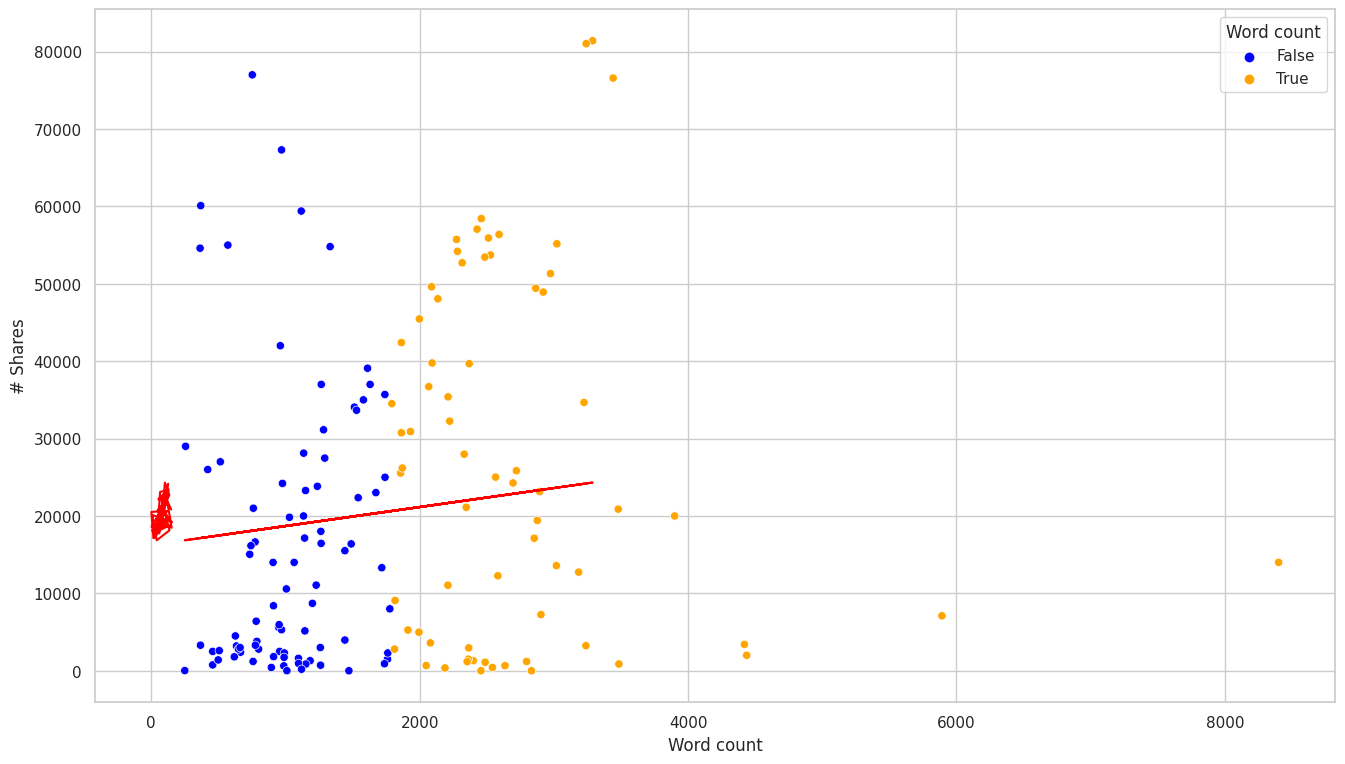

In [62]:
# Configurar colores para los puntos
palette = {True: 'orange', False: 'blue'}

# Graficar el scatterplot con los colores personalizados
sns.scatterplot(data=data, x='Word count', y='# Shares', hue=data['Word count'] > media_palabras, palette=palette)

#Graficamos el modelo
plt.plot(X_test.values, y_pre, color='red')

plt.show()

***Interpretación:*** Vemos que la línea roja (nuestro modelo de Regresión líneal simple, no se ajusta a la mayoría de los datos. Es el motivo por el cuál las métricas no son nada buenas

**CONCLUSIÓN:** Según las métricas e interpretaciones que hemos hecho, podemos considerar que nuestro modelo no es bueno en sus predicciones. Y por tanto tenemos que volver a la segunda etapa de la metodología CRIPS-DM para hacer un entendimiento de los datos, más exhaustivamente y mejorar nuestro modelo.

Además, por el comportamiento de nuestro datos, debemos evaluar al final de la segunda etapa, si una regresión lineal es el modelo adecuado para la predicción de nuestro problema, aparentemente no lo es. Por tanto, deberíamos probar otros modelos.

**Regresión Lineal Multiple**

Mejoremos el modelo agregando más *features* o variables al modelo


Para poder graficar el modelo en 3D uniremos varias variables en 1 sola ([feature engineering](https://www.inesdi.com/blog/que-es-el-feature-engineering-en-machine-learning/))   

**ETAPA 3: PREPARACIÓN DE DATOS**

Modelo de Machine Learning Supervisado, abordaremos con un regresión lineal Multiple

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 1 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           155 non-null    object
 1   url             155 non-null    object
 2   Word count      155 non-null    int64 
 3   # of Links      155 non-null    int64 
 4   # of comments   155 non-null    int64 
 5   # Images video  155 non-null    int64 
 6   Elapsed days    155 non-null    int64 
 7   # Shares        155 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 15.0+ KB


In [88]:
data.isnull().sum()

Title             0
url               0
Word count        0
# of Links        0
# of comments     0
# Images video    0
Elapsed days      0
# Shares          0
dtype: int64

In [114]:
#Feature Engineering
suma = (data['# of Links'] + data['# of comments'].fillna(0) + data['# Images video'])
suma

1      27
2       7
5      10
7       4
8      12
       ..
156    15
157    15
158     9
159    19
160    21
Length: 155, dtype: int64

In [115]:
X2 = data[['Word count']].copy()
X2.head(2)

,Word count
1,1742
2,962


In [116]:
#Creamos los features
X2 = data[['Word count']].copy()

#le adicionamos la columna suma
X2['Suma'] = suma

X2.head()

,Word count,Suma
1,1742,27
2,962,7
5,761,10
7,753,4
8,1118,12


In [117]:
y2 = data[['# Shares']]
y2.head()

,# Shares
1,25000
2,42000
5,21000
7,77000
8,59400


In [118]:
#Separamos los conjuntos en entrenamiento y prueba
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.3)

In [119]:
X_train2.head()

,Word count,Suma
146,2275,12
71,1011,17
152,912,25
53,2400,37
70,2542,6


In [120]:
y_train2.head()

,# Shares
146,55738
71,8
152,1824
53,1300
70,424


In [121]:
X_test2.head()

,Word count,Suma
42,1763,31
20,1333,21
15,971,20
8,1118,12
27,421,12


In [122]:
y_test2.head()

,# Shares
42,2300
20,54800
15,67300
8,59400
27,26000


**ETAPA 4: MODELAMIENTO**
    
    Creamos el modelo de Regresión lineal multiple

In [123]:
#Instanciamos el modelo
reg2 = linear_model.LinearRegression()

In [124]:
#Entrenamos el modelo
reg2.fit(X_train2,y_train2)

LinearRegression()

In [125]:
## Hacemos la predicción
y_pred2 = reg2.predict(X_test2)

In [126]:
y_pred2

array([[13854.78220443],
       [15456.11626892],
       [13837.80041938],
       [17856.23000541],
       [13970.40200722],
       [25630.37348055],
       [21550.6180581 ],
       [15320.17052684],
       [22155.5573105 ],
       [18068.68301337],
       [29276.89931838],
       [18275.30438834],
       [27144.65024561],
       [13558.10293738],
       [14846.88918218],
       [11856.16094728],
       [12895.0124505 ],
       [15149.83064843],
       [14545.83507615],
       [27662.78875552],
       [17582.10759946],
       [29254.17290498],
       [20610.31756798],
       [28481.38125293],
       [15196.5751739 ],
       [14166.72990559],
       [13337.58737463],
       [15207.72532598],
       [18737.43558093],
       [27677.02650488],
       [12053.17596882],
       [24818.89985782],
       [28092.66972894],
       [24469.2138661 ],
       [22797.89129188],
       [16665.65121213],
       [23152.55224111],
       [26653.69999272],
       [22317.57807717],
       [19020.22066021],


In [127]:
reg2.predict([[1763,31]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13854.78220443]])

Para 1763 palabras y 31 unidades en la variable sum, la predicción es de 13854.78 Sin embargo, la realidad son 2300 shares. Se observa que la predicción es imprecisa

In [128]:
reg2.predict([[1333,21]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[15456.11626892]])

Para 1333 palabras y 21 unidades en suma, la predicción es 15456,11
El dato real en shares es de 54800. Se confirma de nuevo mucha impresición en la predicción

**ETAPA 5: EVALUACIÓN DEL MODELO**

En este caso

- y  es las veces que se compartió el artículo *'# Share'*
- x1  es la cantidad de palabras del artículo  *'Word count'*
- m1  es la pendiente de la recta para la variable x1
- x2  es la cantidad de palabras del artículo  *'Suma'*, donde juntamos varias columnas (Feature Engineering)
- m2  es la pendiente de la recta para la variable x2
- b  es el intercepto de la recta

In [129]:
#Veamos los coeficientes obtenidos
reg2.coef_

array([[   5.57507604, -399.86167606]])

En este caso tenemos 2 coeficientes

Interpretemos los coeficientes:

- Manteniendo todos los features fijos, si incrementamos 1 palabra ('Word count') el número de veces que compartimos ('# Shares') **aumenta** en 5.57507604 (relación positiva)
- Manteniendo todos los features fijos, si incrementamos 1 unidad de la variable suma ('suma') el número de veces que compartimos ('# Shares') **disminuye** en 399.86167606 (relación negativa)


In [130]:
#Veamos el intercepto
reg2.intercept_

array([16421.63510817])

Cuando las x's son iguales a cero, el número de shares tiene un valor de 16.421,63

Entonces la ecuación de nuestro modelo es:
<h9><center>**y = 5.57507604 x1 -399.86167606 x2 + 16421.63510817**</center></h9>


In [131]:
mean_squared_error(y_test2,y_pred2)

481324579.9061205

In [132]:
print('RMSE:', np.sqrt(mean_squared_error(y_test2,y_pred2)))

RMSE: 21939.11073644783


In [133]:
r2_score(y_test2,y_pred2)*100

-2.874532124540141

In [134]:
un_feature = np.sqrt(mean_squared_error(y_test,y_pred))
dos_features = np.sqrt(mean_squared_error(y_test2,y_pred2))

print(f'RMSE con un  feature {un_feature}')
print(f'RMSE con dos feature {dos_features}')
print(f'El error bajó {un_feature-dos_features}')

RMSE con un  feature 22680.434918805666
RMSE con dos feature 21939.11073644783
El error bajó 741.3241823578355


In [135]:
un_feature_r2 = r2_score(y_test,y_pred)
dos_feature_r2 = r2_score(y_test2,y_pred2)

print(f'r2 con un  feature {un_feature_r2*100}%')
print(f'r2 con dos feature {dos_feature_r2*100}%')
print(f'El error bajó {(dos_feature_r2-un_feature_r2)*100}%')

r2 con un  feature 2.6468737222698824%
r2 con dos feature -2.874532124540141%
El error bajó -5.5214058468100236%


Ahora has el modelo con más de dos features (variables)

In [137]:
data.columns

Index(['Title', 'url', 'Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days', '# Shares'],
      dtype='object')

In [139]:
X3 = data[['Word count', '# of Links', '# of comments',
       '# Images video', 'Elapsed days']]
y3 = data[['# Shares']]

In [140]:
#Ahora crea los datasets de train y test con train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.3)

In [141]:
#Creamos el modelo
reg3 = linear_model.LinearRegression()

In [142]:
#Entrenamos el modelo (datos train)
reg3.fit(X_train3,y_train3)

LinearRegression()

In [144]:
#Hacer la predicción con los datos de test
y_pred3 = reg3.predict(X_test3)
y_pred3

array([[27667.71289226],
       [14459.99068737],
       [21047.59236841],
       [20088.85530441],
       [20861.55946774],
       [18371.73097192],
       [19560.9584453 ],
       [18456.89550139],
       [23460.03385967],
       [19992.59068364],
       [31751.78398316],
       [22732.95821501],
       [27122.23124496],
       [13583.49184383],
       [13935.74891444],
       [20685.21714394],
       [14415.62811476],
       [23039.785589  ],
       [31252.71591626],
       [18828.93625382],
       [26808.13082066],
       [25832.78362534],
       [18310.26369236],
       [ 9345.66459395],
       [16928.94097106],
       [28417.07062188],
       [23003.93550297],
       [25570.59924509],
       [19512.03036168],
       [24037.70202319],
       [19252.95529053],
       [ -401.09540306],
       [23218.69618103],
       [25767.29574377],
       [11028.40031369],
       [15435.98976317],
       [33815.58417649],
       [18057.27232138],
       [22548.58276695],
       [24282.96049929],


In [145]:
X_train3.head(2)

,Word count,# of Links,# of comments,# Images video,Elapsed days
82,1995,7,6,6,10
35,971,5,9,2,127


In [146]:
y_train3.head(2)

,# Shares
82,4988
35,5300


In [147]:
X_test3.head(2)

,Word count,# of Links,# of comments,# Images video,Elapsed days
107,2528,5,6,2,35
55,800,6,9,2,231


In [149]:
y_test3.head()

,# Shares
107,53720
55,2800
28,14000
142,15512
2,42000


para el registro 107 tenemos 53720 shares y el dato de la predicción es de 27667.71 La conclusión por ahora es que el modelo es impreciso

para el registros 142 con 15512 shares el dato de la predicción es de 20088.85 Tenemos una predicción más cercana al dato real

# EVALUACIÓN

In [151]:
#Veamos los coeficientes obtenidos
reg3.coef_

array([[ 4.79892255e+00, -6.41517100e+02, -3.22302060e-01,
        -8.03555330e+02, -2.17994900e+01]])

Solo la variable word count tiene un coeficiente positivo, las otras variables coeficiente negativo, es decir, si incrementamos 1 unidad en una de estas variables el número de veces que compartimos ('# Shares') disminuye

In [153]:
#Veamos el intercepto
reg3.intercept_

array([21115.6488012])

Cuando las x's son iguales a cero, el número de shares tiene un valor de 21.115,65

In [154]:
mean_squared_error(y_test3,y_pred3)

420413840.19541866

In [155]:
print('RMSE:', np.sqrt(mean_squared_error(y_test3,y_pred3)))

RMSE: 20503.995712919437


El modelo puede tener una desviación en la predicción de 20503 unidades en shares

In [163]:
r2_score(y_test3,y_pred3)*100

6.5126717396727045

El modelo tiene 6.5% de precisión en la predicción. Indicador muy bajo


In [158]:
all_features = np.sqrt(mean_squared_error(y_test3,y_pred3))

print(f'RMSE con un  feature {un_feature}')
print(f'RMSE con dos feature {dos_features}')
print(f'RMSE con all feature {all_features}')
print(f'El error bajó con relación al primer modelo {un_feature-all_features}')
print(f'El error bajó con relación al segundo modelo {dos_features-all_features}')

RMSE con un  feature 22680.434918805666
RMSE con dos feature 21939.11073644783
RMSE con all feature 20503.995712919437
El error bajó con relación al primer modelo 2176.4392058862286
El error bajó con relación al segundo modelo 1435.115023528393


In [165]:
all_feature_r2 = r2_score(y_test3,y_pred3)

print(f'r2 con un  feature {un_feature_r2*100}%')
print(f'r2 con dos feature {dos_feature_r2*100}%')
print(f'r2 con all feature {all_feature_r2*100}%')
print(f'El error bajó {(dos_feature_r2-un_feature_r2)*100}%')
print(f'El error bajó {(all_feature_r2-dos_feature_r2)*100}%')

r2 con un  feature 2.6468737222698824%
r2 con dos feature -2.874532124540141%
r2 con all feature 6.5126717396727045%
El error bajó -5.5214058468100236%
El error bajó 9.387203864212845%


El modelo mejoró y tenemos una precisión del 9.3% Aunque en general aún el modelo no es bueno, este si es mejor que los anteriores realizados